<a href="https://colab.research.google.com/github/ryangpaiva/Neural-Networks/blob/master/Tumores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import tensorflow as tf 
from sklearn.model_selection import train_test_split
import keras

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
caminho ='./drive/My Drive/tumores/'
os.listdir(caminho)

['no', 'yes']

In [ ]:
img_array = cv2.imread(caminho+'yes/'+"a1.jpg", cv2.IMREAD_GRAYSCALE)       

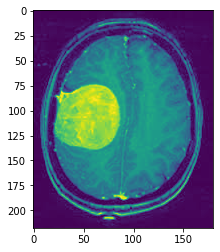

In [ ]:
%matplotlib inline
plt.imshow(img_array)
plt.show()

In [ ]:
def ftumores(caminho):

  subpasta = ['no', 'yes']

  imagem = []
  rotulo = []

  for sub in subpasta:
    arquivos_img = os.listdir(caminho+sub)
    for imagens in arquivos_img:
      img_array = cv2.imread(caminho+sub+'/'+imagens, cv2.IMREAD_GRAYSCALE)
      img_array = cv2.resize(img_array, (30,20), interpolation = cv2.INTER_AREA)
      img_array = tf.keras.utils.normalize(img_array, axis = 1)
      img_array = img_array.reshape(-1)
      imagem.append(img_array)
      if sub == 'yes':
        rotulo.append(1)
      else:
        rotulo.append(0)

  return np.asarray(rotulo), np.asarray(imagem) 

In [ ]:
rotulo, caracteristicas = ftumores(caminho)

In [ ]:
model = keras.Sequential()

model.add(keras.layers.core.Dense(300, input_shape =tuple([caracteristicas.shape[1]]), activation='sigmoid'))

model.add(keras.layers.core.Dense(40, activation='sigmoid'))
model.add(keras.layers.core.Dense(12, activation='sigmoid'))

model.add(keras.layers.Dropout(rate=0.2))


model.add(keras.layers.core.Dense(2, activation='sigmoid'))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 300)               180300    
_________________________________________________________________
dense_18 (Dense)             (None, 40)                12040     
_________________________________________________________________
dense_19 (Dense)             (None, 12)                492       
_________________________________________________________________
dropout_5 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 26        
Total params: 192,858
Trainable params: 192,858
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
caracteristicas_treino, caracteristicas_teste, rotulo_treino, rotulo_test = train_test_split(caracteristicas, rotulo, test_size = 0.2, random_state = 10)

In [ ]:
model.fit(caracteristicas_treino, rotulo_treino, epochs=90)

Epoch 1/90
202/202 [==============================] - 0s 224us/step - loss: 0.1738 - accuracy: 0.9604
Epoch 2/90
202/202 [==============================] - 0s 190us/step - loss: 0.1424 - accuracy: 0.9703
Epoch 3/90
202/202 [==============================] - 0s 178us/step - loss: 0.1442 - accuracy: 0.9703
Epoch 4/90
202/202 [==============================] - 0s 189us/step - loss: 0.1396 - accuracy: 0.9703
Epoch 5/90
202/202 [==============================] - 0s 182us/step - loss: 0.2178 - accuracy: 0.9158
Epoch 6/90
202/202 [==============================] - 0s 175us/step - loss: 0.2022 - accuracy: 0.9406
Epoch 7/90
202/202 [==============================] - 0s 197us/step - loss: 0.2167 - accuracy: 0.9208
Epoch 8/90
202/202 [==============================] - 0s 219us/step - loss: 0.1382 - accuracy: 0.9703
Epoch 9/90
202/202 [==============================] - 0s 193us/step - loss: 0.1420 - accuracy: 0.9653
Epoch 10/90
202/202 [==============================] - 0s 189us/step - loss: 0.146

In [ ]:
model.evaluate(caracteristicas_treino, rotulo_treino)

202/202 [==============================] - 0s 185us/step


[0.1477733894740001, 0.9653465151786804]

In [ ]:
model.evaluate(caracteristicas_teste, rotulo_test)

51/51 [==============================] - 0s 237us/step


[0.7174082468537724, 0.7647058963775635]

In [ ]:
predictions = model.predict(caracteristicas_teste)
predictions[0:5]

array([[0.57512236, 0.02732417],
       [0.02181408, 0.6003615 ],
       [0.4806481 , 0.03716454],
       [0.02285308, 0.58914405],
       [0.02237064, 0.594839  ]], dtype=float32)

In [ ]:
rotulo_pred = ["livre de tumor" if x[0] > x[1] else "com tumor" for x in predictions]
rotulo_pred[0:10]

['livre de tumor',
 'com tumor',
 'livre de tumor',
 'com tumor',
 'com tumor',
 'com tumor',
 'com tumor',
 'com tumor',
 'com tumor',
 'livre de tumor']

In [ ]:
classifications = model.predict(caracteristicas)
print(classifications[15])

[0.57276535 0.02787012]


In [ ]:
len(rotulo)

In [ ]:
sum(rotulo)

In [ ]:
caracteristicas.shape


(253, 600)

AQUI VAMOS COLOCAR UMA IMAGEM EXTERNA 
. 

. 

. 

. 

. 

. 
Selecione uma imagem, gere um link compartilhavel, entre neste link e pegue o link de downlaod


In [ ]:
from urllib.request import urlretrieve

urlretrieve("https://drive.google.com/u/0/uc?id=1DTZ6X7Tunu0GdnxYD7MUE0NI1b_bVsJv&export=download", "tumor.jpg")

('tumor.jpg', <http.client.HTTPMessage at 0x7f08b5548cf8>)

In [ ]:
tumor = cv2.imread('tumor.jpg',cv2.IMREAD_GRAYSCALE )
print(tumor)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 88 84 90]
 [ 0  0  0 ... 88 84 90]
 [ 0  0  0 ... 88 84 90]]


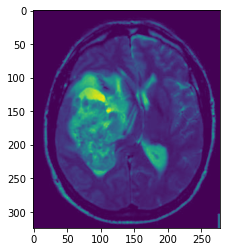

In [ ]:
%matplotlib inline
plt.imshow(tumor)
plt.show()

In [ ]:
tumor = cv2.resize(tumor, (30,20), interpolation = cv2.INTER_AREA) 
len(tumor)

20

In [ ]:
tumor = tf.keras.utils.normalize(tumor, axis=1) 
tumor

In [ ]:
tumor= tumor.reshape(-1)
tumor

In [ ]:
np.vstack((caracteristicas_teste, tumor ))

array([[0.46386014, 0.13529254, 0.13529254, ..., 0.12129953, 0.21025252,
        0.35581195],
       [0.08496959, 0.04575286, 0.04575286, ..., 0.02827706, 0.02827706,
        0.05251454],
       [0.29168202, 0.12069601, 0.12069601, ..., 0.02323195, 0.02323195,
        0.0975742 ],
       ...,
       [0.00670748, 0.00670748, 0.00670748, ..., 0.03135833, 0.03135833,
        0.03135833],
       [0.0807087 , 0.0807087 , 0.08495652, ..., 0.04942236, 0.04942236,
        0.04942236],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.40218669]])

In [ ]:
len(classifications)

253

In [ ]:
print(classifications[252])

[0.02492772 0.5672575 ]


Outro Teste

In [ ]:
from urllib.request import urlretrieve

urlretrieve("https://drive.google.com/u/0/uc?id=1sQtSkeUk9iMCyFKlTzFi5Ej0ztEocZpf&export=download", "amostra.jpg")

('amostra.jpg', <http.client.HTTPMessage at 0x7f08b4a90390>)

In [ ]:
amostra = cv2.imread('amostra.jpg',cv2.IMREAD_GRAYSCALE )
print(tumor)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.15617376
 0.15617376 0.15617376 0.31234752 0.31234752 0.31234752 0.46852129
 0.62469505 0.15617376 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.02858602 0.12863708 0.20010212 0.1715161
 0.22868814 0.20010212 0.24298114 0.38591123 0.5002553  0.1715161
 0.21439513 0.35732521 0.3430322  0.20010212 0.04287903 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.007206   0.11529604 0.12970805 0.11529604 0.18015006 0.15132605
 0.07926603 0.15853206 0.15853206 0.24500409 0.40353614 0.43236015
 0.36030013 0.43236015 0.21618008 0.18735607 0.14412005 0.12250204
 0.02161801 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.034

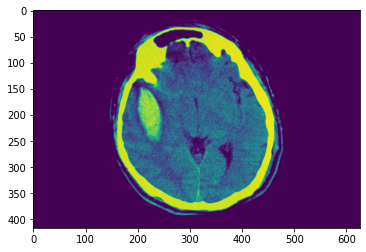

In [ ]:
%matplotlib inline
plt.imshow(amostra)
plt.show()

In [ ]:
amostra = cv2.resize(amostra, (30,20), interpolation = cv2.INTER_AREA) 
len(amostra)

20

In [ ]:
amostra = tf.keras.utils.normalize(amostra, axis=1) 
amostra

In [ ]:
amostra= amostra.reshape(-1)
amostra

In [ ]:
np.vstack((caracteristicas_treino, amostra ))

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2514373 , 0.08045994, 0.09051743, ..., 0.21989679, 0.23822153,
        0.18324733],
       ...,
       [0.15977031, 0.18315133, 0.17925449, ..., 0.1825026 , 0.1825026 ,
        0.1825026 ],
       [0.04500225, 0.04500225, 0.04500225, ..., 0.0353443 , 0.0353443 ,
        0.0353443 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
len(classifications)

253

In [ ]:
print(classifications[252])

[0.02492772 0.5672575 ]


In [ ]:
for sub in amostra:
  